In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import os
from typing import Any

matplotlibColors = plt.rcParams["axes.prop_cycle"].by_key()["color"]


In [3]:
def extractRunNameFromJson(fileName: str) -> str:
    fileName = fileName.removeprefix("logs_fit_")
    fileName = fileName.removesuffix("_train.json")
    fileName = fileName.removesuffix("_validation.json")
    return fileName


In [4]:
MaskFaceBasePath = "../graphs/data/MaskFace/"
jsonLogFilesMaskFace = os.listdir(MaskFaceBasePath)

FileNotFoundError: [WinError 3] Das System kann den angegebenen Pfad nicht finden: '../graphs/data/accuracy/'

In [ ]:
maskFaceTrain = dict()
maskFaceValidation = dict()
for jsonLogFile in jsonLogFilesMaskFace:
    if jsonLogFile.__contains__("train"):
        maskFaceTrain[extractRunNameFromJson(jsonLogFile)] = pd.read_json(
            MaskFaceBasePath + jsonLogFile
        )
    elif jsonLogFile.__contains__("validation"):
        maskFaceValidation[extractRunNameFromJson(jsonLogFile)] = pd.read_json(
            MaskFaceBasePath + jsonLogFile
        )


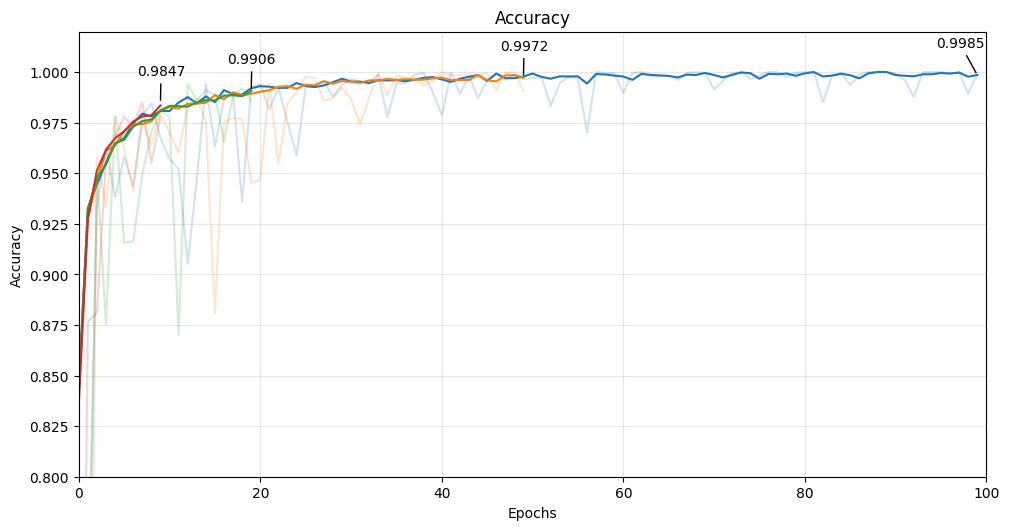

In [ ]:
# comparison accuracy batch size 32

fig, ax = plt.subplots()

ax.plot(
    maskFaceTrain["logs_fit_MobileNet_MultiTask_epochs-50_batch-32_Face"][1],
    maskFaceTrain["logs_fit_MobileNet_MultiTask_epochs-50_batch-32_Face"][2],
    label="Face_train",
)
ax.plot(
    maskFaceTrain["logs_fit_MobileNet_MultiTask_epochs-50_batch-32_Mask"][1],
    maskFaceTrain["logs_fit_MobileNet_MultiTask_epochs-50_batch-32_Mask"][2],
    label="Mask_train",
)

ax.plot(
    maskFaceValidation["logs_fit_MobileNet_MultiTask_epochs-50_batch-32_Face"][1],
    maskFaceValidation["logs_fit_MobileNet_MultiTask_epochs-50_batch-32_Face"][2],
    label="Face_val",
    alpha=0.5,
    color=matplotlibColors[0],
)
ax.plot(
    maskFaceValidation["logs_fit_MobileNet_MultiTask_epochs-50_batch-32_Mask"][1],
    maskFaceValidation["logs_fit_MobileNet_MultiTask_epochs-50_batch-32_Mask"][2],
    label="Mask_val",
    alpha=0.5,
    color=matplotlibColors[1],
)

ax.annotate(
    "0.9847",
    xy=(9, 0.9847),
    xycoords="data",
    xytext=(-17, 20),
    textcoords="offset points",
    arrowprops=dict(arrowstyle="-"),
)

ax.annotate(
    "0.9906",
    xy=(19, 0.9906),
    xycoords="data",
    xytext=(-17, 20),
    textcoords="offset points",
    arrowprops=dict(arrowstyle="-"),
)

ax.annotate(
    "0.9972",
    xy=(49, 0.9972),
    xycoords="data",
    xytext=(-17, 20),
    textcoords="offset points",
    arrowprops=dict(arrowstyle="-"),
)

ax.annotate(
    "0.9985",
    xy=(99, 0.9985),
    xycoords="data",
    xytext=(-30, 20),
    textcoords="offset points",
    arrowprops=dict(arrowstyle="-"),
)


ax.set_xlim([0, 100])
ax.set_ylim([0.8, 1.02])
ax.figure.set_size_inches([10, 5])
plt.tight_layout()
ax.set_xlabel("Epochs")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy Face and Mask Detection")
ax.grid(alpha=0.3)


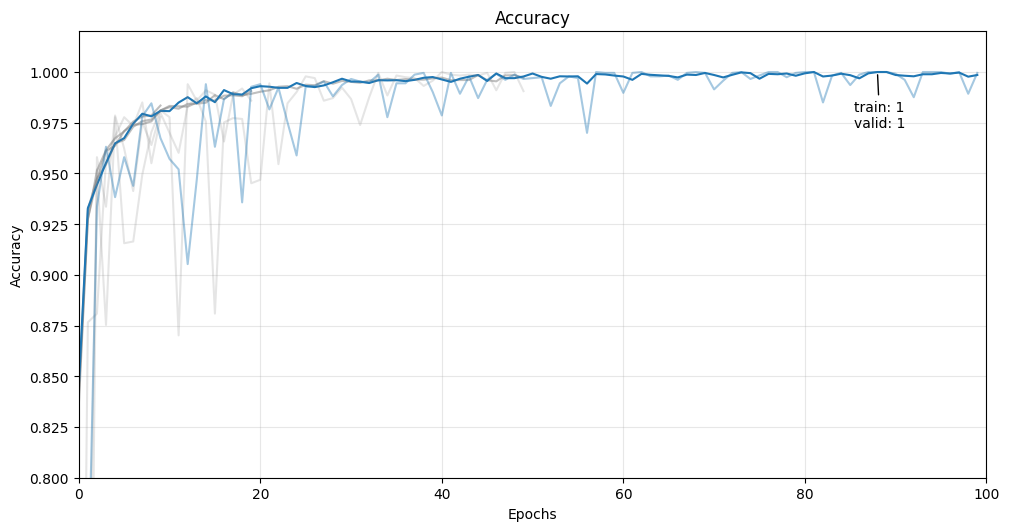

In [60]:
# comparison accuracy batch size 32

fig, ax = plt.subplots()

ax.plot(
    maskFaceTrain["MobileNetV1_scratch_epochs-50_batch-32"][1],
    maskFaceTrain["MobileNetV1_scratch_epochs-50_batch-32"][2],
    label="50 Epochs",
    color="gray",
    alpha=0.5
)
ax.plot(
    maskFaceTrain["MobileNetV1_scratch_epochs-20_batch-32"][1],
    maskFaceTrain["MobileNetV1_scratch_epochs-20_batch-32"][2],
    label="20 Epochs",
    color="gray",
    alpha=0.5
)
ax.plot(
    maskFaceTrain["MobileNetV1_scratch_epochs-10_batch-32"][1],
    maskFaceTrain["MobileNetV1_scratch_epochs-10_batch-32"][2],
    label="10 Epochs",
    color="gray",
    alpha=0.5
)
ax.plot(
    maskFaceTrain["MobileNetV1_scratch_epochs-100_batch-32"][1],
    maskFaceTrain["MobileNetV1_scratch_epochs-100_batch-32"][2],
    label="100 Epochs",
)

ax.plot(
    maskFaceValidation["MobileNetV1_scratch_epochs-50_batch-32"][1],
    maskFaceValidation["MobileNetV1_scratch_epochs-50_batch-32"][2],
    label="50 Epochs",
    alpha=0.2,
    color="gray"
)
ax.plot(
    maskFaceValidation["MobileNetV1_scratch_epochs-20_batch-32"][1],
    maskFaceValidation["MobileNetV1_scratch_epochs-20_batch-32"][2],
    label="20 Epochs",
    alpha=0.2,
    color="gray",
)
ax.plot(
    maskFaceValidation["MobileNetV1_scratch_epochs-10_batch-32"][1],
    maskFaceValidation["MobileNetV1_scratch_epochs-10_batch-32"][2],
    label="10 Epochs",
    alpha=0.2,
    color="gray",
)
ax.plot(
    maskFaceValidation["MobileNetV1_scratch_epochs-100_batch-32"][1],
    maskFaceValidation["MobileNetV1_scratch_epochs-100_batch-32"][2],
    label="100 Epochs",
    alpha=0.4,
    color=matplotlibColors[0],
)

ax.annotate(
    "train: 1\nvalid: 1",
    xy=(88, 1),
    xycoords="data",
    xytext=(-17, -40),
    textcoords="offset points",
    arrowprops=dict(arrowstyle="-"),
)


ax.set_xlim([0, 100])
ax.set_ylim([0.8, 1.02])
ax.figure.set_size_inches([10, 5])
plt.tight_layout()
ax.set_xlabel("Epochs")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy")
ax.grid(alpha=0.3)


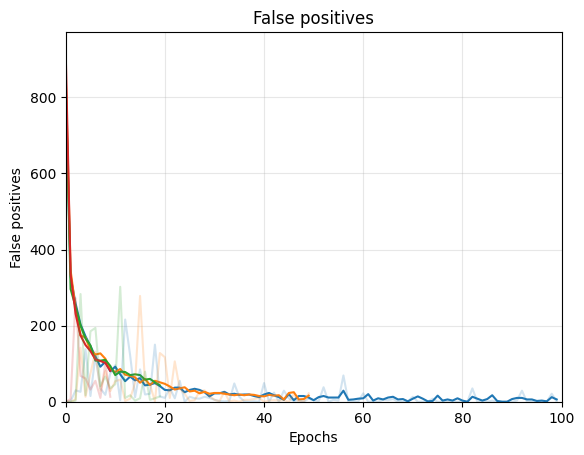

In [61]:
# comparison false positives batch size 32

fig, ax = plt.subplots()

ax.plot(
    falsePositivesTrain["MobileNetV1_scratch_epochs-100_batch-32"][1],
    falsePositivesTrain["MobileNetV1_scratch_epochs-100_batch-32"][2],
    label="100 Epochs",
)
ax.plot(
    falsePositivesTrain["MobileNetV1_scratch_epochs-50_batch-32"][1],
    falsePositivesTrain["MobileNetV1_scratch_epochs-50_batch-32"][2],
    label="50 Epochs",
)
ax.plot(
    falsePositivesTrain["MobileNetV1_scratch_epochs-20_batch-32"][1],
    falsePositivesTrain["MobileNetV1_scratch_epochs-20_batch-32"][2],
    label="20 Epochs",
)
ax.plot(
    falsePositivesTrain["MobileNetV1_scratch_epochs-10_batch-32"][1],
    falsePositivesTrain["MobileNetV1_scratch_epochs-10_batch-32"][2],
    label="10 Epochs",
)

ax.plot(
    falsePositivesValidation["MobileNetV1_scratch_epochs-100_batch-32"][1],
    falsePositivesValidation["MobileNetV1_scratch_epochs-100_batch-32"][2],
    label="100 Epochs",
    alpha=0.2,
    color=matplotlibColors[0],
)
ax.plot(
    falsePositivesValidation["MobileNetV1_scratch_epochs-50_batch-32"][1],
    falsePositivesValidation["MobileNetV1_scratch_epochs-50_batch-32"][2],
    label="50 Epochs",
    alpha=0.2,
    color=matplotlibColors[1],
)
ax.plot(
    falsePositivesValidation["MobileNetV1_scratch_epochs-20_batch-32"][1],
    falsePositivesValidation["MobileNetV1_scratch_epochs-20_batch-32"][2],
    label="20 Epochs",
    alpha=0.2,
    color=matplotlibColors[2],
)
ax.plot(
    falsePositivesValidation["MobileNetV1_scratch_epochs-10_batch-32"][1],
    falsePositivesValidation["MobileNetV1_scratch_epochs-10_batch-32"][2],
    label="10 Epochs",
    alpha=0.2,
    color=matplotlibColors[3],
)

ax.set_xlim([0, 100])
ax.set_ylim(0)
ax.set_xlabel("Epochs")
ax.set_ylabel("False positives")
ax.set_title("False positives")
ax.grid(alpha=0.3)


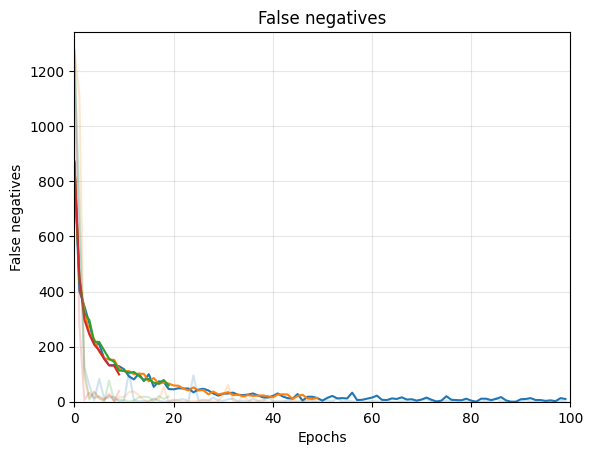

In [62]:
# comparison false positives batch size 32

fig, ax = plt.subplots()

ax.plot(
    falseNegativesTrain["MobileNetV1_scratch_epochs-100_batch-32"][1],
    falseNegativesTrain["MobileNetV1_scratch_epochs-100_batch-32"][2],
    label="100 Epochs",
)
ax.plot(
    falseNegativesTrain["MobileNetV1_scratch_epochs-50_batch-32"][1],
    falseNegativesTrain["MobileNetV1_scratch_epochs-50_batch-32"][2],
    label="50 Epochs",
)
ax.plot(
    falseNegativesTrain["MobileNetV1_scratch_epochs-20_batch-32"][1],
    falseNegativesTrain["MobileNetV1_scratch_epochs-20_batch-32"][2],
    label="20 Epochs",
)
ax.plot(
    falseNegativesTrain["MobileNetV1_scratch_epochs-10_batch-32"][1],
    falseNegativesTrain["MobileNetV1_scratch_epochs-10_batch-32"][2],
    label="10 Epochs",
)

ax.plot(
    falseNegativesValidation["MobileNetV1_scratch_epochs-100_batch-32"][1],
    falseNegativesValidation["MobileNetV1_scratch_epochs-100_batch-32"][2],
    label="100 Epochs",
    alpha=0.2,
    color=matplotlibColors[0],
)
ax.plot(
    falseNegativesValidation["MobileNetV1_scratch_epochs-50_batch-32"][1],
    falseNegativesValidation["MobileNetV1_scratch_epochs-50_batch-32"][2],
    label="50 Epochs",
    alpha=0.2,
    color=matplotlibColors[1],
)
ax.plot(
    falseNegativesValidation["MobileNetV1_scratch_epochs-20_batch-32"][1],
    falseNegativesValidation["MobileNetV1_scratch_epochs-20_batch-32"][2],
    label="20 Epochs",
    alpha=0.2,
    color=matplotlibColors[2],
)
ax.plot(
    falseNegativesValidation["MobileNetV1_scratch_epochs-10_batch-32"][1],
    falseNegativesValidation["MobileNetV1_scratch_epochs-10_batch-32"][2],
    label="10 Epochs",
    alpha=0.2,
    color=matplotlibColors[3],
)

ax.set_xlim([0, 100])
ax.set_ylim(0)
ax.set_xlabel("Epochs")
ax.set_ylabel("False negatives")
ax.set_title("False negatives")
ax.grid(alpha=0.3)


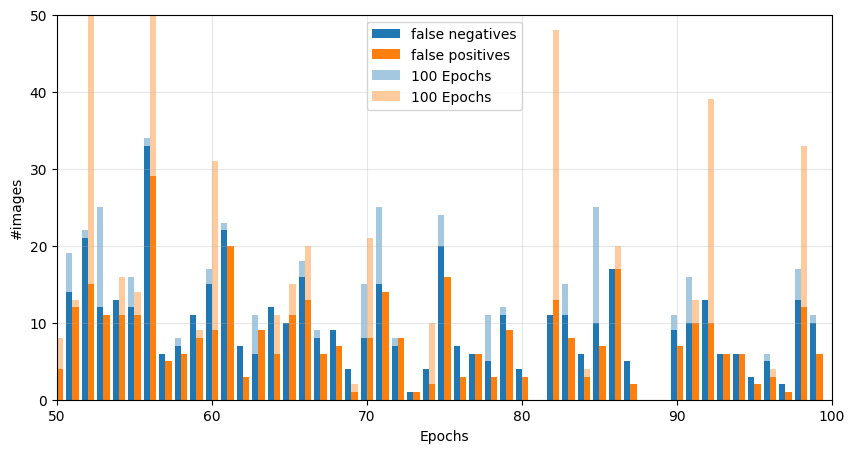

In [63]:
import numpy as np

fig, ax = plt.subplots()

x = np.arange(len(falseNegativesTrain["MobileNetV1_scratch_epochs-100_batch-32"][1]))
width = 0.4

ax.bar(
    x - width/2,
    falseNegativesTrain["MobileNetV1_scratch_epochs-100_batch-32"][2],
    width = width,
    label="false negatives",
)
ax.bar(
    x + width/2,
    falsePositivesTrain["MobileNetV1_scratch_epochs-100_batch-32"][2],
    width = width,
    label="false positives",
)

temp1 = np.add(falseNegativesTrain["MobileNetV1_scratch_epochs-100_batch-32"][2],falseNegativesValidation["MobileNetV1_scratch_epochs-100_batch-32"][2])
temp2 = np.add(falsePositivesTrain["MobileNetV1_scratch_epochs-100_batch-32"][2],falsePositivesValidation["MobileNetV1_scratch_epochs-100_batch-32"][2])

ax.bar(
    x - width/2,
    temp1,
    width = width,
    label="100 Epochs",
    alpha=0.4,
    color=matplotlibColors[0],
)
ax.bar(
    x + width/2,
    temp2,
    width = width,
    label="100 Epochs",
    alpha=0.4,
    color=matplotlibColors[1],
)

ax.set_xlim([50, 100])
ax.set_ylim([0,50])
ax.set_xlabel("Epochs")
ax.set_ylabel("#images")
ax.grid(alpha=0.3)
ax.figure.set_size_inches([10, 5])
ax.legend()


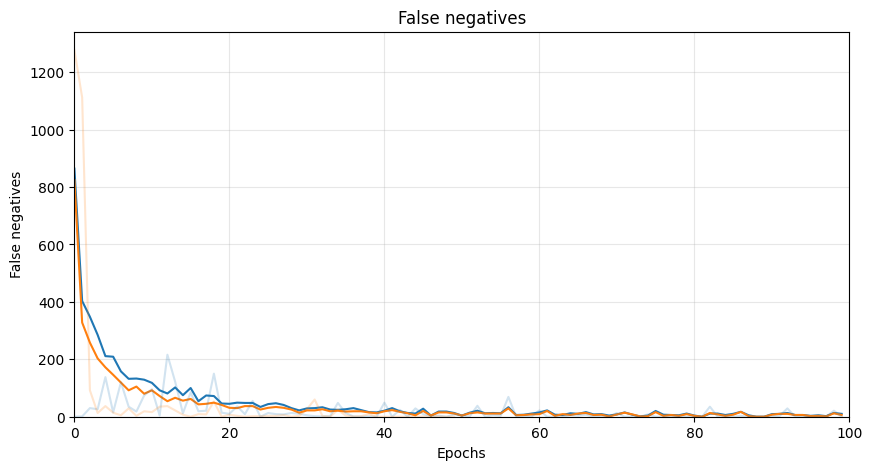

In [64]:
# comparison false positives and false negatives batch size 32, epoch 100

fig, ax = plt.subplots()

ax.plot(
    falseNegativesTrain["MobileNetV1_scratch_epochs-100_batch-32"][1],
    falseNegativesTrain["MobileNetV1_scratch_epochs-100_batch-32"][2],
    label="False negatives",
)
ax.plot(
    falsePositivesTrain["MobileNetV1_scratch_epochs-100_batch-32"][1],
    falsePositivesTrain["MobileNetV1_scratch_epochs-100_batch-32"][2],
    label="False positives",
)

ax.plot(
    falsePositivesValidation["MobileNetV1_scratch_epochs-100_batch-32"][1],
    falsePositivesValidation["MobileNetV1_scratch_epochs-100_batch-32"][2],
    label="False positives",
    alpha=0.2,
    color=matplotlibColors[0],
)
ax.plot(
    falseNegativesValidation["MobileNetV1_scratch_epochs-50_batch-32"][1],
    falseNegativesValidation["MobileNetV1_scratch_epochs-50_batch-32"][2],
    label="False negatives",
    alpha=0.2,
    color=matplotlibColors[1],
)

ax.set_xlim([0, 100])
ax.set_ylim(0)
ax.set_xlabel("Epochs")
ax.set_ylabel("False negatives")
ax.set_title("False negatives")
ax.figure.set_size_inches([10, 5])
ax.grid(alpha=0.3)


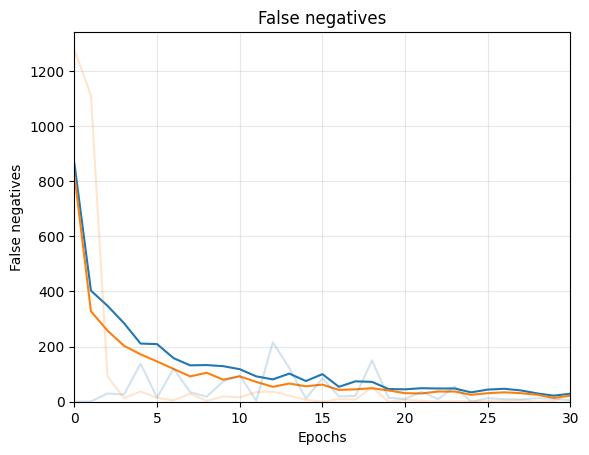

In [65]:
# comparison false positives and false negatives batch size 32, epoch 100, cropped

fig, ax = plt.subplots()

ax.plot(
    falseNegativesTrain["MobileNetV1_scratch_epochs-100_batch-32"][1],
    falseNegativesTrain["MobileNetV1_scratch_epochs-100_batch-32"][2],
    label="False negatives",
)
ax.plot(
    falsePositivesTrain["MobileNetV1_scratch_epochs-100_batch-32"][1],
    falsePositivesTrain["MobileNetV1_scratch_epochs-100_batch-32"][2],
    label="False positives",
)

ax.plot(
    falsePositivesValidation["MobileNetV1_scratch_epochs-100_batch-32"][1],
    falsePositivesValidation["MobileNetV1_scratch_epochs-100_batch-32"][2],
    label="False positives",
    alpha=0.2,
    color=matplotlibColors[0],
)
ax.plot(
    falseNegativesValidation["MobileNetV1_scratch_epochs-50_batch-32"][1],
    falseNegativesValidation["MobileNetV1_scratch_epochs-50_batch-32"][2],
    label="False negatives",
    alpha=0.2,
    color=matplotlibColors[1],
)

ax.set_xlim([0, 30])
ax.set_ylim(0)
ax.set_xlabel("Epochs")
ax.set_ylabel("False negatives")
ax.set_title("False negatives")
ax.grid(alpha=0.3)


In [66]:
transferAccuracyTrain = dict()
transferAccuracyValidation = dict()
for jsonLogFile in jsonLogFilesTransferAccuracy:
    if jsonLogFile.__contains__("train"):
        transferAccuracyTrain[extractRunNameFromJson(jsonLogFile)] = pd.read_json(
            transferAccuracyBasePath + jsonLogFile
        )
    elif jsonLogFile.__contains__("validation"):
        transferAccuracyValidation[extractRunNameFromJson(jsonLogFile)] = pd.read_json(
            transferAccuracyBasePath + jsonLogFile
        )

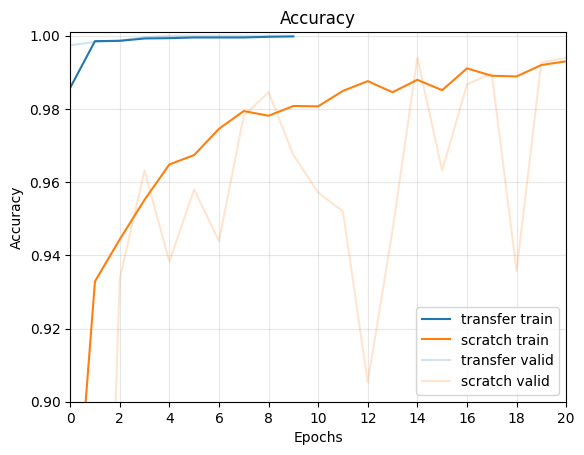

In [67]:
fig, ax = plt.subplots()

ax.plot(
    transferAccuracyTrain["MobileNetV1_TL_transfer_epochs-10_batch-32"][1],
    transferAccuracyTrain["MobileNetV1_TL_transfer_epochs-10_batch-32"][2],
    label="transfer train",
)
ax.plot(
    maskFaceTrain["MobileNetV1_scratch_epochs-100_batch-32"][1],
    maskFaceTrain["MobileNetV1_scratch_epochs-100_batch-32"][2],
    label="scratch train",
)

ax.plot(
    transferAccuracyValidation["MobileNetV1_TL_transfer_epochs-10_batch-32"][1],
    transferAccuracyValidation["MobileNetV1_TL_transfer_epochs-10_batch-32"][2],
    label="transfer valid",
    alpha=0.2,
    color=matplotlibColors[0],
)
ax.plot(
    maskFaceValidation["MobileNetV1_scratch_epochs-100_batch-32"][1],
    maskFaceValidation["MobileNetV1_scratch_epochs-100_batch-32"][2],
    label="scratch valid",
    alpha=0.2,
    color=matplotlibColors[1],
)

ax.set_xlim([0, 20])
ax.set_xticks(range(0,21, 2))
ax.set_ylim([0.9, 1.001])
ax.set_xlabel("Epochs")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy")
ax.legend()
ax.grid(alpha=0.3)

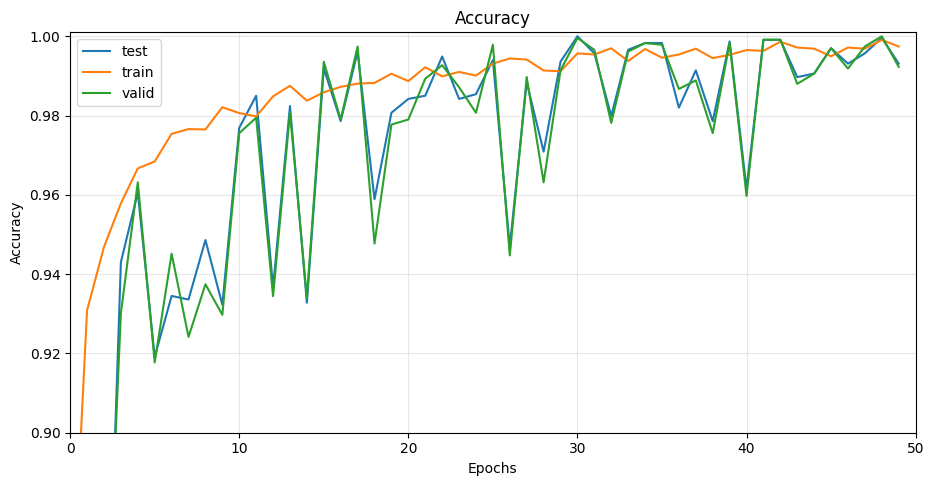

In [68]:
checkpointTest = pd.read_json("../graphs/data/checkpoints/accuracy_test.json")
checkpointTrain = pd.read_json("../graphs/data/checkpoints/accuracy_train.json")
checkpointValid = pd.read_json("../graphs/data/checkpoints/accuracy_validation.json")

fig, ax = plt.subplots()

ax.plot(
    checkpointTest[1],
    checkpointTest[2],
    label="test",
)
ax.plot(
    checkpointTrain[1],
    checkpointTrain[2],
    label="train",
)
ax.plot(
    checkpointValid[1],
    checkpointValid[2],
    label="valid",
)

ax.set_xlim([0, 50])
ax.set_ylim([0.9, 1.001])
ax.set_xlabel("Epochs")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy")
ax.legend()
plt.tight_layout()
ax.figure.set_size_inches([10, 5])
ax.grid(alpha=0.3)

In [69]:
print(checkpointValid[2][48])
print(checkpointTrain[2][48])
print(checkpointTest[2][48])

0.991859495639801
0.9971538782119751
0.9996


In [70]:
batchAccuracyTrain = dict()
batchAccuracyValidation = dict()
for jsonLogFile in jsonLogFilesBatch:
    if jsonLogFile.__contains__("train"):
        batchAccuracyTrain[extractRunNameFromJson(jsonLogFile)] = pd.read_json(
            batchBasePath + jsonLogFile
        )
    elif jsonLogFile.__contains__("validation"):
        batchAccuracyValidation[extractRunNameFromJson(jsonLogFile)] = pd.read_json(
            batchBasePath + jsonLogFile
        )

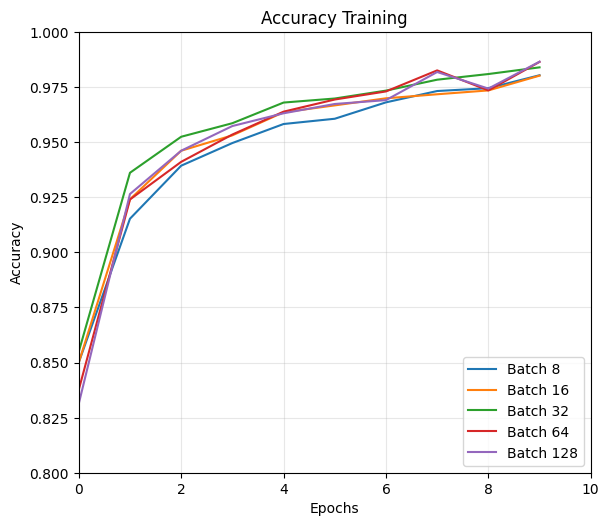

In [90]:
# comparison accuracy batch sizes

fig, ax = plt.subplots()

ax.plot(
    batchAccuracyTrain["MobileNetV1_BatchTest_scratch_epochs-10_batch-8"][1],
    batchAccuracyTrain["MobileNetV1_BatchTest_scratch_epochs-10_batch-8"][2],
    label="Batch 8",
)
ax.plot(
    batchAccuracyTrain["MobileNetV1_BatchTest_scratch_epochs-10_batch-16"][1],
    batchAccuracyTrain["MobileNetV1_BatchTest_scratch_epochs-10_batch-16"][2],
    label="Batch 16",
)
ax.plot(
    batchAccuracyTrain["MobileNetV1_BatchTest_scratch_epochs-10_batch-32"][1],
    batchAccuracyTrain["MobileNetV1_BatchTest_scratch_epochs-10_batch-32"][2],
    label="Batch 32",
)
ax.plot(
    batchAccuracyTrain["MobileNetV1_BatchTest_scratch_epochs-10_batch-64"][1],
    batchAccuracyTrain["MobileNetV1_BatchTest_scratch_epochs-10_batch-64"][2],
    label="Batch 64",
)
ax.plot(
    batchAccuracyTrain["MobileNetV1_BatchTest_scratch_epochs-10_batch-128"][1],
    batchAccuracyTrain["MobileNetV1_BatchTest_scratch_epochs-10_batch-128"][2],
    label="Batch 128",
)

ax.set_xlim([0, 10])
ax.set_ylim([0.8, 1])
ax.figure.set_size_inches([6, 5])
plt.tight_layout()
ax.set_xlabel("Epochs")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy Training")
ax.legend()
ax.grid(alpha=0.3)

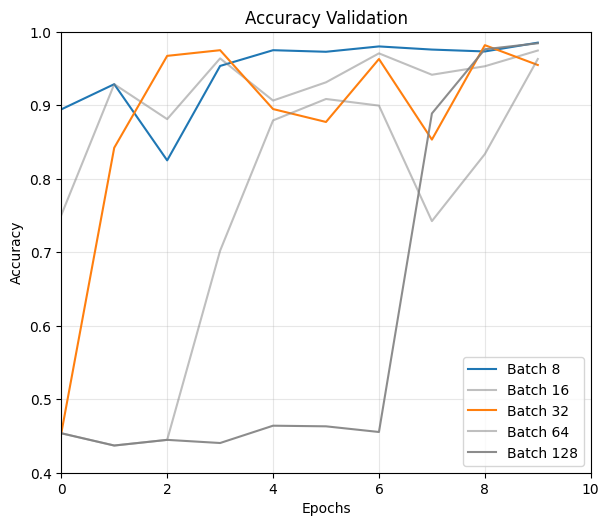

In [89]:
# comparison accuracy batch sizes

fig, ax = plt.subplots()

ax.plot(
    batchAccuracyValidation["MobileNetV1_BatchTest_scratch_epochs-10_batch-8"][1],
    batchAccuracyValidation["MobileNetV1_BatchTest_scratch_epochs-10_batch-8"][2],
    label="Batch 8",
)
ax.plot(
    batchAccuracyValidation["MobileNetV1_BatchTest_scratch_epochs-10_batch-16"][1],
    batchAccuracyValidation["MobileNetV1_BatchTest_scratch_epochs-10_batch-16"][2],
    label="Batch 16",
    color="gray",
    alpha=0.5
)
ax.plot(
    batchAccuracyValidation["MobileNetV1_BatchTest_scratch_epochs-10_batch-32"][1],
    batchAccuracyValidation["MobileNetV1_BatchTest_scratch_epochs-10_batch-32"][2],
    label="Batch 32",
)
ax.plot(
    batchAccuracyValidation["MobileNetV1_BatchTest_scratch_epochs-10_batch-64"][1],
    batchAccuracyValidation["MobileNetV1_BatchTest_scratch_epochs-10_batch-64"][2],
    label="Batch 64",
    color="gray",
    alpha=0.5
)
ax.plot(
    batchAccuracyValidation["MobileNetV1_BatchTest_scratch_epochs-10_batch-128"][1],
    batchAccuracyValidation["MobileNetV1_BatchTest_scratch_epochs-10_batch-128"][2],
    label="Batch 128",
    color="gray",
    alpha=0.9
)

ax.set_xlim([0, 10])
ax.set_ylim([0.4, 1])
ax.figure.set_size_inches([6, 5])
plt.tight_layout()
ax.set_xlabel("Epochs")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy Validation")
ax.legend()
ax.grid(alpha=0.3)